In [200]:
from pandas import Interval
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from functools import reduce
from operator import mul


In [13]:
df = pd.read_csv('fixed_floats.csv')

In [14]:
df

,cntroom,floor,maxfloor,livingarea,totalarea,kitchenarea,year,ceiling,finishing,garbage,...,typeofhouse,district,width,long,pas,gruz,combined,separate,lodge,balkone
0,4,2,25,180.0,236.0,20.0,2000.0,3.00,NaN,NaN,...,Монолитнокирпичный,ЗАО,55.728003,37.443533,3,3,2,0,0,0
1,4,14,39,48.0,89.0,16.0,2022.0,3.00,NaN,Да,...,NaN,ЗАО,55.728003,37.443533,3,2,2,0,0,0
2,4,32,39,62.0,109.0,18.0,2022.0,3.10,NaN,Нет,...,NaN,ЗАО,55.728003,37.443533,5,2,2,0,0,0
3,4,2,25,145.0,236.0,15.0,2000.0,NaN,NaN,Да,...,Монолитнокирпичный,ЗАО,55.728003,37.443533,2,1,2,0,0,0
4,4,14,18,68.1,109.4,14.0,2004.0,3.00,NaN,NaN,...,Монолитный,ЗАО,55.728003,37.443533,3,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,1,8,8,19.0,30.0,6.0,1960.0,2.70,NaN,Да,...,NaN,ЦАО,55.773884,37.581379,1,0,1,0,0,1
3530,0,1,6,20.0,27.0,5.0,1926.0,3.20,NaN,NaN,...,Кирпичный,ЦАО,55.722441,37.628658,1,0,1,0,0,0
3531,2,3,5,28.3,46.7,7.0,1953.0,2.95,NaN,NaN,...,NaN,ЦАО,55.770340,37.685503,1,0,0,1,0,1
3532,0,3,5,9.0,16.0,2.0,NaN,5.00,NaN,Нет,...,Кирпичный,ЮАО,55.709698,37.612389,0,0,1,0,0,0


In [15]:
columns = ['totalarea','district', 'ceiling', 'kitchenarea', 'maxfloor', 'cntroom']
target = ['price2',]

In [16]:
df = df[target+columns]

In [17]:
df

,price2,totalarea,district,ceiling,kitchenarea,maxfloor,cntroom
0,211441,236.0,ЗАО,3.00,20.0,25,4
1,561798,89.0,ЗАО,3.00,16.0,39,4
2,458716,109.0,ЗАО,3.10,18.0,39,4
3,211441,236.0,ЗАО,NaN,15.0,25,4
4,456124,109.4,ЗАО,3.00,14.0,18,4
...,...,...,...,...,...,...,...
3529,533300,30.0,ЦАО,2.70,6.0,8,1
3530,222222,27.0,ЦАО,3.20,5.0,6,0
3531,417559,46.7,ЦАО,2.95,7.0,5,2
3532,506250,16.0,ЮАО,5.00,2.0,5,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price2       3534 non-null   int64  
 1   totalarea    3534 non-null   float64
 2   district     3534 non-null   object 
 3   ceiling      2624 non-null   float64
 4   kitchenarea  2779 non-null   float64
 5   maxfloor     3534 non-null   int64  
 6   cntroom      3534 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 193.4+ KB


In [21]:
df.groupby('cntroom').apply(lambda x: x[['ceiling', 'kitchenarea']].describe())

ceiling  kitchenarea
cntroom                                
0       count   343.000000   294.000000
        mean      3.014111     5.802041
        std       0.314251     3.654516
        min       2.500000     0.900000
        25%       2.850000     3.425000
        50%       3.000000     5.000000
        75%       3.100000     6.650000
        max       5.000000    23.100000
1       count   728.000000   807.000000
        mean      2.914725    11.714002
        std       0.344060     5.279852
        min       2.480000     2.000000
        25%       2.650000     8.200000
        50%       3.000000    10.000000
        75%       3.100000    15.000000
        max       5.700000    56.200000
2       count  1066.000000  1137.000000
        mean      2.950563    12.645207
        std       0.342270     6.478108
        min       2.200000     4.000000
        25%       2.700000     8.200000
        50%       3.000000    11.000000
        75%       3.100000    16.100000
        max       5.700000    59.000000
3       count     2.000000     0.000000
        mean      3.400000          NaN
        std       0.424264          NaN
        min       3.100000          NaN
        25%       3.250000          NaN
        50%       3.400000          NaN
        75%       3.550000          NaN
        max       3.700000          NaN
4       count   378.000000   426.000000
        mean      3.171296    19.756573
        std       0.470057    11.898434
        min       2.000000     4.000000
        25%       3.000000    12.000000
        50%       3.100000    17.000000
        75%       3.200000    23.225000
        max       7.000000   103.300000
5       count   107.000000   115.000000
        mean      3.346916    22.580870
        std       0.694904    10.917770
        min       2.640000     6.100000
        25%       3.000000    15.000000
        50%       3.150000    20.000000
        75%       3.300000    30.000000
        max       6.350000    60.000000

In [23]:
exp_df = df.dropna()

In [24]:
exp_df

,price2,totalarea,district,ceiling,kitchenarea,maxfloor,cntroom
0,211441,236.0,ЗАО,3.00,20.0,25,4
1,561798,89.0,ЗАО,3.00,16.0,39,4
2,458716,109.0,ЗАО,3.10,18.0,39,4
4,456124,109.4,ЗАО,3.00,14.0,18,4
6,395000,40.0,СЗАО,3.00,19.2,53,1
...,...,...,...,...,...,...,...
3529,533300,30.0,ЦАО,2.70,6.0,8,1
3530,222222,27.0,ЦАО,3.20,5.0,6,0
3531,417559,46.7,ЦАО,2.95,7.0,5,2
3532,506250,16.0,ЮАО,5.00,2.0,5,0


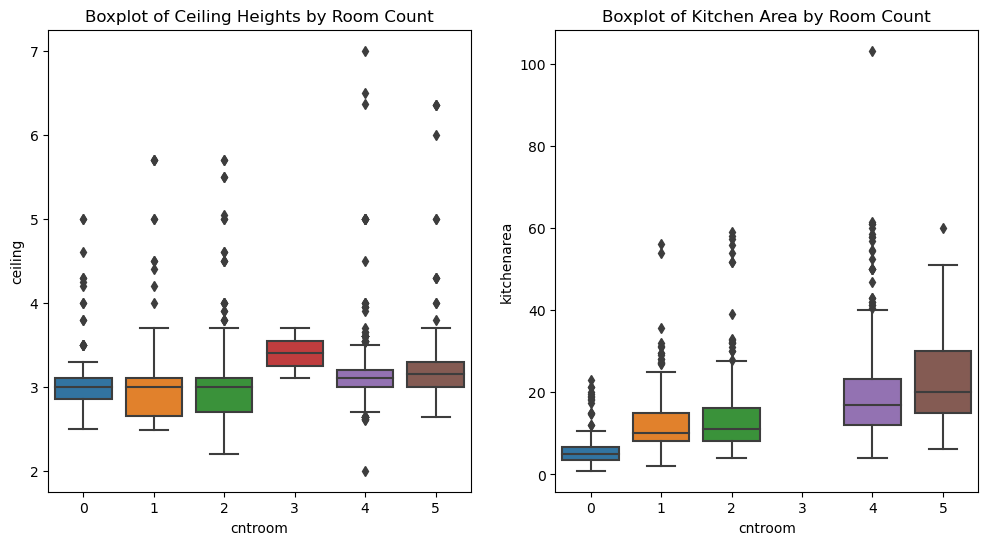

In [28]:

# Диаграммы размаха (boxplots)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cntroom', y='ceiling')
plt.title('Boxplot of Ceiling Heights by Room Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='cntroom', y='kitchenarea')
plt.title('Boxplot of Kitchen Area by Room Count')

plt.show()


In [29]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

df = replace_outliers_with_median(df, 'ceiling')
df = replace_outliers_with_median(df, 'kitchenarea')


C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\4045378999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\4045378999.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])


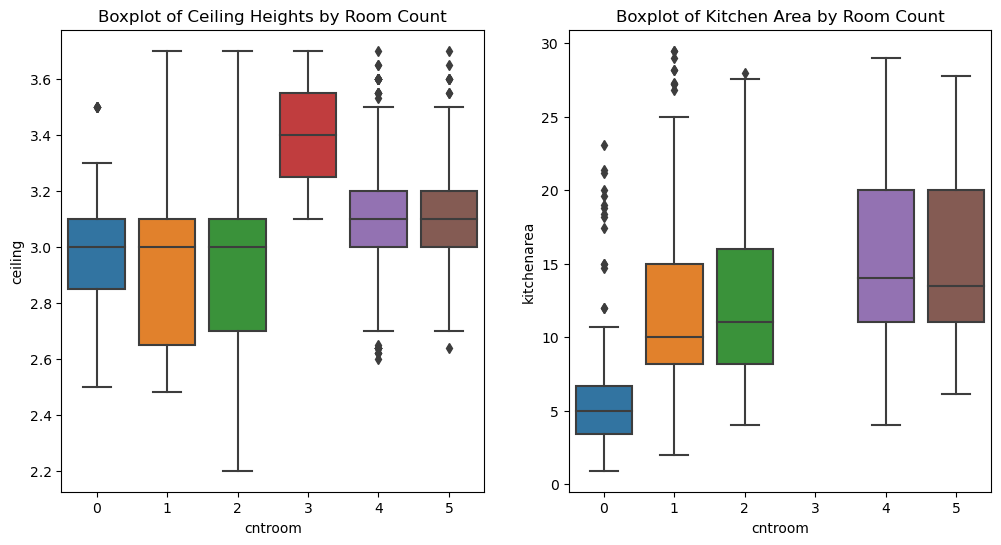

In [30]:

# Диаграммы размаха (boxplots)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cntroom', y='ceiling')
plt.title('Boxplot of Ceiling Heights by Room Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='cntroom', y='kitchenarea')
plt.title('Boxplot of Kitchen Area by Room Count')

plt.show()


In [37]:
df.dropna(inplace=True)

C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [39]:
df

,price2,totalarea,district,ceiling,kitchenarea,maxfloor,cntroom
0,211441,236.0,ЗАО,3.00,20.0,25,4
1,561798,89.0,ЗАО,3.00,16.0,39,4
2,458716,109.0,ЗАО,3.10,18.0,39,4
4,456124,109.4,ЗАО,3.00,14.0,18,4
6,395000,40.0,СЗАО,3.00,19.2,53,1
...,...,...,...,...,...,...,...
3529,533300,30.0,ЦАО,2.70,6.0,8,1
3530,222222,27.0,ЦАО,3.20,5.0,6,0
3531,417559,46.7,ЦАО,2.95,7.0,5,2
3532,506250,16.0,ЮАО,3.00,2.0,5,0


In [43]:
df[['totalarea', 'kitchenarea', 'ceiling']].describe()

,totalarea,kitchenarea,ceiling
count,2057.000000,2057.000000,2057.000000
mean,64.012338,11.827175,2.937069
std,44.191297,5.500300,0.238013
min,11.600000,0.900000,2.200000
25%,37.680000,8.000000,2.700000
50%,50.000000,10.700000,3.000000
75%,69.700000,15.500000,3.100000
max,433.300000,29.500000,3.700000


In [54]:
df

,price2,totalarea,district,ceiling,kitchenarea,maxfloor,cntroom,area_cohort,ceiling_cohort,price_per_sqm,price_per_ceil,kitchen_cohort
0,211441,236.0,ЗАО,3.00,20.0,25,4,"(180.28, 264.62]",3.01-999,895.936441,70480.333333,"(18.06, 23.78]"
1,561798,89.0,ЗАО,3.00,16.0,39,4,"(11.178, 95.94]",3.01-999,6312.337079,187266.000000,"(12.34, 18.06]"
2,458716,109.0,ЗАО,3.10,18.0,39,4,"(95.94, 180.28]",3.01-999,4208.403670,147972.903226,"(12.34, 18.06]"
4,456124,109.4,ЗАО,3.00,14.0,18,4,"(95.94, 180.28]",3.01-999,4169.323583,152041.333333,"(12.34, 18.06]"
6,395000,40.0,СЗАО,3.00,19.2,53,1,"(11.178, 95.94]",3.01-999,9875.000000,131666.666667,"(18.06, 23.78]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3529,533300,30.0,ЦАО,2.70,6.0,8,1,"(11.178, 95.94]",0-2.77,17776.666667,197518.518519,"(0.871, 6.62]"
3530,222222,27.0,ЦАО,3.20,5.0,6,0,"(11.178, 95.94]",3.01-999,8230.444444,69444.375000,"(0.871, 6.62]"
3531,417559,46.7,ЦАО,2.95,7.0,5,2,"(11.178, 95.94]",2.78-3,8941.306210,141545.423729,"(6.62, 12.34]"
3532,506250,16.0,ЮАО,3.00,2.0,5,0,"(11.178, 95.94]",3.01-999,31640.625000,168750.000000,"(0.871, 6.62]"


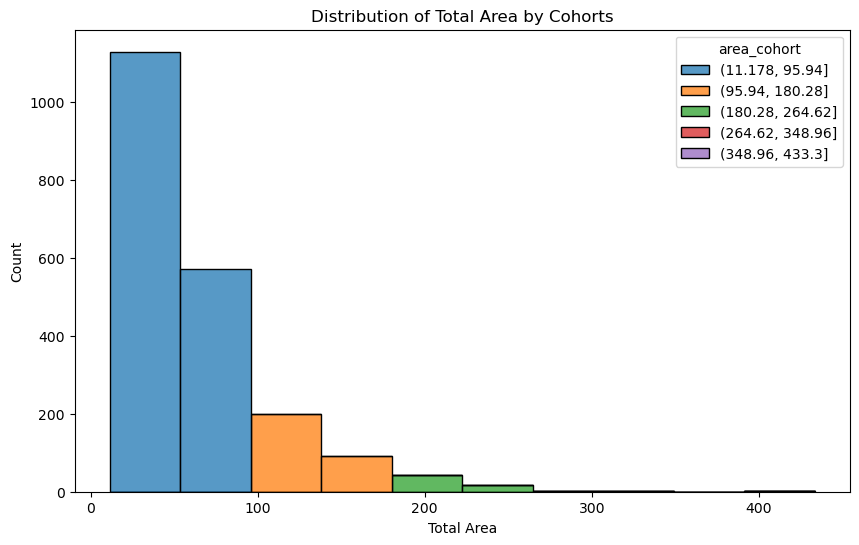

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='totalarea', hue='area_cohort', multiple='stack', bins=10)
plt.title('Distribution of Total Area by Cohorts')
plt.xlabel('Total Area')
plt.ylabel('Count')
plt.show()


C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\3908644046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqm'] = df['price2'] / df['totalarea']


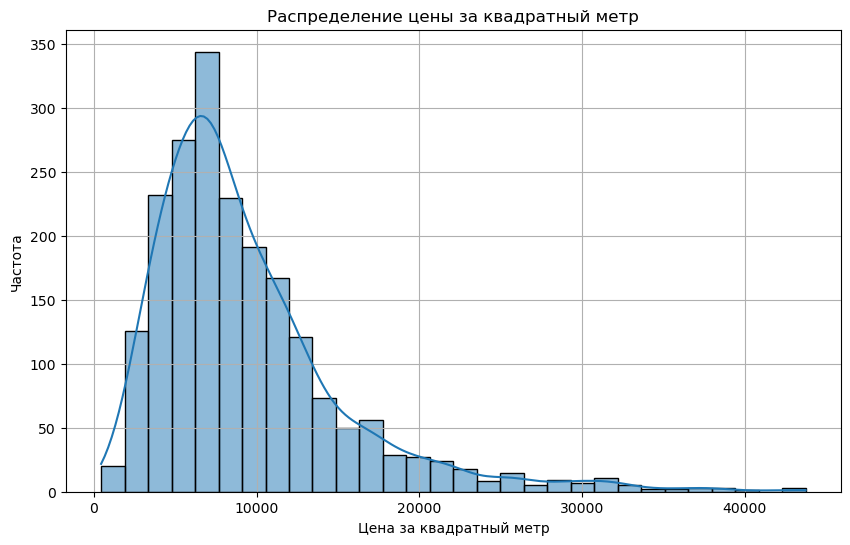

In [50]:
df['price_per_sqm'] = df['price2'] / df['totalarea']

# Построение распределения цены за квадратный метр
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqm'], kde=True, bins=30)
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\3076932656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_ceil'] = df['price2'] / df['ceiling']


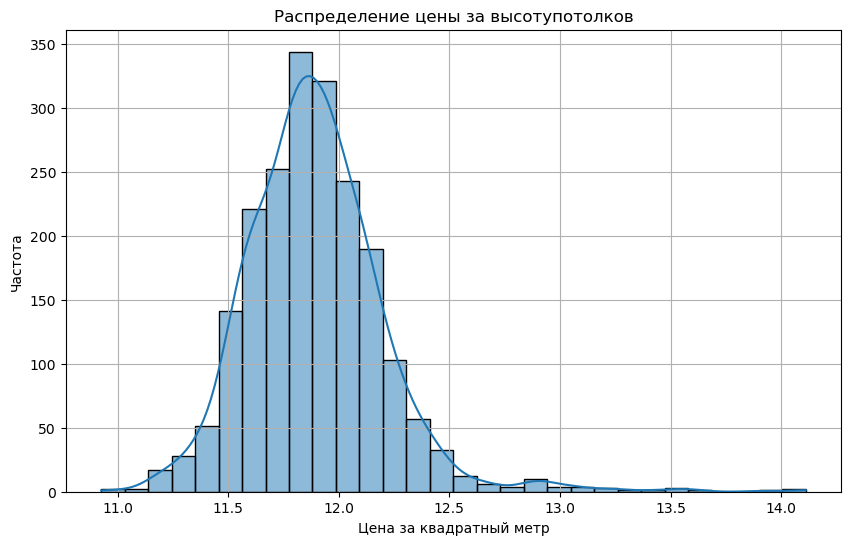

In [52]:
df['price_per_ceil'] = df['price2'] / df['ceiling']

# Построение распределения цены за квадратный метр
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['price_per_ceil']), kde=True, bins=30)
plt.title('Распределение цены за высотупотолков')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [59]:
df

,price2,totalarea,district,ceiling,kitchenarea,maxfloor,cntroom,area_cohort,ceiling_cohort,price_per_sqm,price_per_ceil,kitchen_cohort,maxfloor_cohort
0,211441,236.0,ЗАО,3.00,20.0,25,4,"(180.28, 264.62]",3.01-999,895.936441,70480.333333,"(18.06, 23.78]","(14.0, 26.0]"
1,561798,89.0,ЗАО,3.00,16.0,39,4,"(11.178, 95.94]",3.01-999,6312.337079,187266.000000,"(12.34, 18.06]","(38.0, 50.0]"
2,458716,109.0,ЗАО,3.10,18.0,39,4,"(95.94, 180.28]",3.01-999,4208.403670,147972.903226,"(12.34, 18.06]","(38.0, 50.0]"
4,456124,109.4,ЗАО,3.00,14.0,18,4,"(95.94, 180.28]",3.01-999,4169.323583,152041.333333,"(12.34, 18.06]","(14.0, 26.0]"
6,395000,40.0,СЗАО,3.00,19.2,53,1,"(11.178, 95.94]",3.01-999,9875.000000,131666.666667,"(18.06, 23.78]","(50.0, 62.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,533300,30.0,ЦАО,2.70,6.0,8,1,"(11.178, 95.94]",0-2.77,17776.666667,197518.518519,"(0.871, 6.62]","(1.94, 14.0]"
3530,222222,27.0,ЦАО,3.20,5.0,6,0,"(11.178, 95.94]",3.01-999,8230.444444,69444.375000,"(0.871, 6.62]","(1.94, 14.0]"
3531,417559,46.7,ЦАО,2.95,7.0,5,2,"(11.178, 95.94]",2.78-3,8941.306210,141545.423729,"(6.62, 12.34]","(1.94, 14.0]"
3532,506250,16.0,ЮАО,3.00,2.0,5,0,"(11.178, 95.94]",3.01-999,31640.625000,168750.000000,"(0.871, 6.62]","(1.94, 14.0]"


In [60]:
df.dtypes

price2                int64
totalarea           float64
district             object
ceiling             float64
kitchenarea         float64
maxfloor              int64
cntroom               int64
area_cohort        category
ceiling_cohort     category
price_per_sqm       float64
price_per_ceil      float64
kitchen_cohort     category
maxfloor_cohort    category
dtype: object

In [145]:
cohorts = ['district', 'totalarea','ceiling', 'kitchenarea', 'maxfloor']
cntroom = ['cntroom',]

In [0]:
# df['area_cohort'] = pd.cut(df['totalarea'], bins=5)
# bins = [0, 2.77, 3, 999]
# labels = ['0-2.77', '2.78-3', '3.01-999']
# df['ceiling_cohort'] = pd.cut(df['ceiling'], bins=bins, labels=labels, right=False)
# df['kitchen_cohort'] = pd.cut(df['kitchenarea'], bins=5)
# df['maxfloor_cohort'] = pd.cut(df['maxfloor'], bins=5)

In [151]:
df_coef = df[target+cntroom+cohorts]

In [65]:
# unique_values_dict = {column: df_coef[column].unique().tolist() for column in coef_columns}

In [198]:
C = df[target].mean()[0]
C

460424.4579484686

In [132]:
df_coef

,price2,cntroom,district,totalarea,ceiling,kitchenarea,maxfloor
0,211441,4,ЗАО,236.0,3.00,20.0,25
1,561798,4,ЗАО,89.0,3.00,16.0,39
2,458716,4,ЗАО,109.0,3.10,18.0,39
4,456124,4,ЗАО,109.4,3.00,14.0,18
6,395000,1,СЗАО,40.0,3.00,19.2,53
...,...,...,...,...,...,...,...
3529,533300,1,ЦАО,30.0,2.70,6.0,8
3530,222222,0,ЦАО,27.0,3.20,5.0,6
3531,417559,2,ЦАО,46.7,2.95,7.0,5
3532,506250,0,ЮАО,16.0,3.00,2.0,5


In [138]:
district = list(df_coef.district.unique())
district

['ЗАО', 'СЗАО', 'ЮВАО', 'ЦАО', 'САО', 'СВАО', 'ЮАО']

In [139]:
i = 0
new_district = []
for dis in district:
    new_district.append([dis,i])
    i+=1
district = new_district
district

[['ЗАО', 0],
 ['СЗАО', 1],
 ['ЮВАО', 2],
 ['ЦАО', 3],
 ['САО', 4],
 ['СВАО', 5],
 ['ЮАО', 6]]

In [154]:
total_cohorts = [       [Interval(0., 95.94, closed='right'), 0],
                        [Interval(95.94, 180.28, closed='right'), 1],
                        [Interval(180.28, 264.62, closed='right'),2],
                        [Interval(264.62, 348.96, closed='right'),3]
                        # [Interval(348.96, 999., closed='right'), 4],
        ]
ceiling_cohort = [      [Interval(0., 2.77, closed='right'),0],
                        [Interval(2.77, 3., closed='right'),1],
                        [Interval(3., 999, closed='right'),2],
                 ]
kitchen_cohort = [      [Interval(0., 6.62, closed='right'), 0],
                        [Interval(6.62, 12.34, closed='right'), 1],
                        [Interval(12.34, 18.06, closed='right'), 2],
                        [Interval(18.06, 23.78, closed='right'), 3],
                        # [Interval(23.78, 99, closed='right'), 4],
                ]
maxfloor_cohort = [     [Interval(0., 14.0, closed='right'),0],
                        [Interval(14.0, 26.0, closed='right'),1],
                        [Interval(26.0, 38.0, closed='right'),2],
                        [Interval(38.0, 50.0, closed='right'),3],
                        # Interval(50.0, 62.0, closed='right'),               
                ]

In [155]:
dict_cohorts = {
    'totalarea': total_cohorts,
    'ceiling': ceiling_cohort,
    'kitchenarea': kitchen_cohort,
    'maxfloor': maxfloor_cohort,
}

In [121]:
def val_cohort(val_int:float, cohorts):
    for cohort in cohorts:
        if val_int in cohort[0]:
            return cohort[1]
    else:
        return cohorts[-1][1]+1

In [126]:
dict_coef = {}

In [146]:
cohorts

['district', 'totalarea', 'ceiling', 'kitchenarea', 'maxfloor']

In [143]:
df_coef

,price2,cntroom,district,totalarea,ceiling,kitchenarea,maxfloor
0,211441,4,ЗАО,236.0,3.00,20.0,25
1,561798,4,ЗАО,89.0,3.00,16.0,39
2,458716,4,ЗАО,109.0,3.10,18.0,39
4,456124,4,ЗАО,109.4,3.00,14.0,18
6,395000,1,СЗАО,40.0,3.00,19.2,53
...,...,...,...,...,...,...,...
3529,533300,1,ЦАО,30.0,2.70,6.0,8
3530,222222,0,ЦАО,27.0,3.20,5.0,6
3531,417559,2,ЦАО,46.7,2.95,7.0,5
3532,506250,0,ЮАО,16.0,3.00,2.0,5


In [156]:
for cohort in dict_cohorts:
    new_col = []
    for value in df_coef[cohort]:
        new_col.append(val_cohort(value, dict_cohorts[cohort]))
    df_coef[f"{cohort}_cat"] = new_col

C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\235208692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef[f"{cohort}_cat"] = new_col
C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\235208692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef[f"{cohort}_cat"] = new_col


In [158]:
df_coef.drop(dict_cohorts.keys(), axis=1, inplace=True)

C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\3913047989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef.drop(dict_cohorts.keys(), axis=1, inplace=True)


In [159]:
df_coef

,price2,cntroom,district,totalarea_cat,ceiling_cat,kitchenarea_cat,maxfloor_cat
0,211441,4,ЗАО,2,1,3,1
1,561798,4,ЗАО,0,1,2,3
2,458716,4,ЗАО,1,2,2,3
4,456124,4,ЗАО,1,1,2,1
6,395000,1,СЗАО,0,1,3,4
...,...,...,...,...,...,...,...
3529,533300,1,ЦАО,0,0,0,0
3530,222222,0,ЦАО,0,2,0,0
3531,417559,2,ЦАО,0,1,1,0
3532,506250,0,ЮАО,0,1,0,0


In [177]:
cohorts = [c+'_cat' for c in cohorts[1:]] + ['district']

In [186]:
cohorts

['totalarea_cat', 'ceiling_cat', 'kitchenarea_cat', 'maxfloor_cat', 'district']

In [187]:
all_c = cohorts + cntroom

In [188]:
dict_coef = {}

In [194]:
for key in all_c:
    dict_k = {}
    unique_values = list(df_coef[key].unique())
    for val in unique_values:
        mean = df_coef[df_coef[key] == val].price2.mean()/C[0]
        dict_k[val] = mean
    dict_coef[key] = dict_k

In [195]:
dict_coef

{'totalarea_cat': {2: 1.2574455832538123,
  0: 0.9013803571522678,
  1: 1.2688939250745064,
  3: 1.9139310011690085,
  4: 0.40132155823949445},
 'ceiling_cat': {1: 0.9787812815027429,
  2: 1.1701150707997428,
  0: 0.7299636007189997},
 'kitchenarea_cat': {3: 1.036052309972536,
  2: 0.9800787920402851,
  1: 0.949033775687167,
  4: 1.2652038658604587,
  0: 0.8952125396392485},
 'maxfloor_cat': {1: 0.8923434501277424,
  3: 1.1103873172611698,
  4: 1.1381555509290395,
  0: 0.9884098716487432,
  2: 1.0027573463996697},
 'district': {'ЗАО': 1.1446112997524105,
  'СЗАО': 0.8835640483836873,
  'ЮВАО': 0.797622467263528,
  'ЦАО': 1.2382072455536117,
  'САО': 1.0279421848283334,
  'СВАО': 0.9238836677207934,
  'ЮАО': 1.0632822983727035},
 'cntroom': {4: 1.1170034555376445,
  1: 0.9210685476338965,
  2: 0.89851529538546,
  5: 1.253374788924556,
  0: 1.0330147942735062}}

In [191]:
new_price = []

In [202]:
for index, row in df_coef.iterrows():
    pr = [C,]
    for col in df_coef.columns[1:]:
        pr.append(dict_coef[col][row[col]])
    new_price.append(round(reduce(mul, pr)))

In [204]:
df_coef['mpc'] = new_price

C:\Users\rshir\AppData\Local\Temp\ipykernel_10512\802379513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coef['mpc'] = new_price


In [205]:
df_coef

,price2,cntroom,district,totalarea_cat,ceiling_cat,kitchenarea_cat,maxfloor_cat,mpc
0,211441,4,ЗАО,2,1,3,1,669822
1,561798,4,ЗАО,0,1,2,3,565197
2,458716,4,ЗАО,1,2,2,3,951175
4,456124,4,ЗАО,1,1,2,1,639403
6,395000,1,СЗАО,0,1,3,4,389821
...,...,...,...,...,...,...,...,...
3529,533300,1,ЦАО,0,0,0,0,305715
3530,222222,0,ЦАО,0,2,0,0,549614
3531,417559,2,ЦАО,0,1,1,0,423926
3532,506250,0,ЮАО,0,1,0,0,394794
